# Encoding und Skalierung

Die 2 bekanntesten Arten für das Encoding sind das One-Hot-Encoding und das Label-Encoding. 

## Label encoding

Das Label-Encoding ist eine einfache Methode, um kategorische Daten in numerische Daten umzuwandeln. Es wird verwendet, wenn die kategorischen Daten eine natürliche Ordnung aufweisen.

Der Vorteil des Label encodings ist, dass keine neuen Spalten und Freiheitsgrade entstehen.

Ein Problem kann sein, dass durch die Umwandlung in numerische Daten eine Ordnung suggeriert wird, die nicht vorhanden ist.

In Python können wir das Label-Encoding mit der `LabelEncoder` Klasse aus dem `sklearn.preprocessing` Modul durchführen.

In [124]:
from sklearn.preprocessing import LabelEncoder

labels = ['BB', 'B', 'A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'AA']

# Sortiert und Codiert die Liste labels
encoder = LabelEncoder()

# Der "lange" Weg, wenn man erst den Encoder die Labels "lernen" lassen will und danach transformieren
encoder.fit(labels)
encoder.transform(['B', 'D', 'F', 'H', 'J', 'A'])

array([ 2,  5,  7,  9, 11,  0])

In [125]:
# Der "kurze" Weg, wenn lernen und übersetzen in einem Schritt erfolgen soll
encoder.fit_transform(labels)

# # Anschließend kann ich den encoder trotzdem mit anderen Listen verwenden
# encoder.transform(['B', 'D', 'F', 'H', 'J', 'A'])

array([ 3,  2,  0,  4,  5,  6,  7,  8,  9, 10, 11,  1])

In [126]:
# Wir können auch den umgekehrten Weg gehen und die numerischen Werte in Labels umwandeln
encoder.inverse_transform([1, 3, 5, 7, 9, 2])

array(['AA', 'BB', 'D', 'F', 'H', 'B'], dtype='<U2')

In [127]:
encoder.classes_

array(['A', 'AA', 'B', 'BB', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
      dtype='<U2')

### One Hot Encoding

Das One-Hot-Encoding ist eine Methode, um kategorische Daten in numerische Daten umzuwandeln. Es wird verwendet, wenn die kategorischen Daten keine natürliche Ordnung aufweisen.

Vorteile: Die codierten Daten sind unabhängig von der Kodierung und es entsteht keine Ordnung.

Nachteile: Es entstehen neue Spalten und Freiheitsgrade.

In Python können wir das One-Hot-Encoding mit der `OneHotEncoder` Klasse aus dem `sklearn.preprocessing` Modul durchführen. Alternativ können wir auch die `get_dummies` Funktion aus dem `pandas` Modul verwenden.

In [128]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

out = encoder.fit_transform(pd.DataFrame(labels)).toarray()
out

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [129]:
classes = encoder.get_feature_names_out()
classes 

array(['x0_A', 'x0_AA', 'x0_B', 'x0_BB', 'x0_C', 'x0_D', 'x0_E', 'x0_F',
       'x0_G', 'x0_H', 'x0_I', 'x0_J'], dtype=object)

In [130]:
pd.DataFrame(out, columns=classes)

,x0_A,x0_AA,x0_B,x0_BB,x0_C,x0_D,x0_E,x0_F,x0_G,x0_H,x0_I,x0_J
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [131]:
numeric_col = [5, 3, 1, 7, 9, 0, 7, 2, 4, 5, 1, 5]

In [132]:
df = pd.DataFrame({"Kategorisch": labels, "Numerisch": numeric_col})
df

,Kategorisch,Numerisch
0,BB,5
1,B,3
2,A,1
3,C,7
4,D,9
5,E,0
6,F,7
7,G,2
8,H,4
9,I,5


In [133]:
df.corr()  # funktioniert nur mit numerischen Werten numeric_only=True

ValueError: could not convert string to float: 'BB'

In [54]:
df_numeric = pd.get_dummies(df, dtype=int)
df_numeric

,Numerisch,Kategorisch_A,Kategorisch_AA,Kategorisch_B,Kategorisch_BB,Kategorisch_C,Kategorisch_D,Kategorisch_E,Kategorisch_F,Kategorisch_G,Kategorisch_H,Kategorisch_I,Kategorisch_J
0,5,0,0,0,1,0,0,0,0,0,0,0,0
1,3,0,0,1,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,0,0,0
3,7,0,0,0,0,1,0,0,0,0,0,0,0
4,9,0,0,0,0,0,1,0,0,0,0,0,0
5,0,0,0,0,0,0,0,1,0,0,0,0,0
6,7,0,0,0,0,0,0,0,1,0,0,0,0
7,2,0,0,0,0,0,0,0,0,1,0,0,0
8,4,0,0,0,0,0,0,0,0,0,1,0,0
9,5,0,0,0,0,0,0,0,0,0,0,1,0


<Axes: >

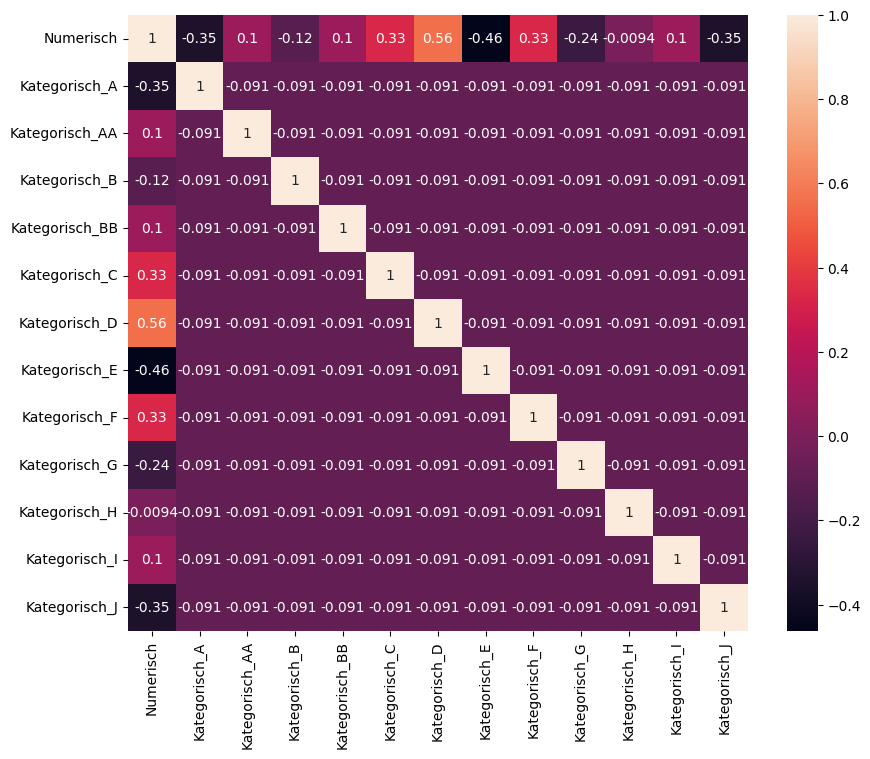

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True)

In [58]:
# Das gleiche mit einem Label encoding

encoder = LabelEncoder()

df["Kategorisch"] = encoder.fit_transform(df["Kategorisch"])
df

,Kategorisch,Numerisch
0,3,5
1,2,3
2,0,1
3,4,7
4,5,9
5,6,0
6,7,7
7,8,2
8,9,4
9,10,5


<Axes: >

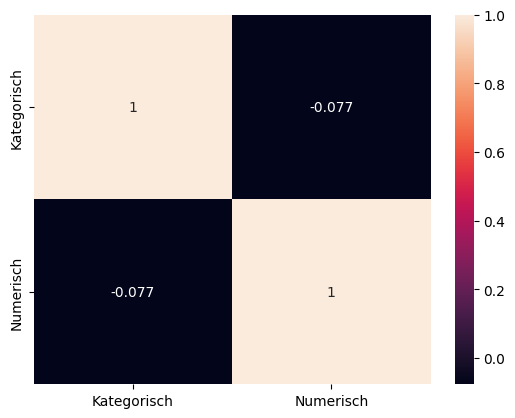

In [59]:
sns.heatmap(df.corr(), annot=True)

# Skalierungen

Die beiden Listen haben unterschiedliche Skalierungen. Das Alter ist im Bereich von 20 bis 60 und das Einkommen im Bereich von 10000 bis 50000.

Manuell würden wir diese Skalierung über Faktoren vornehmen.

In [68]:
alter = [20, 30, 40, 50, 60]
einkommen_pa = [10000, 20000, 30000, 40000, 50000]

einkommens_alter_indikator = [
    1000 * _alter + _einkommen for _alter, _einkommen in zip(alter, einkommen_pa)]
einkommens_alter_indikator

[30000, 50000, 70000, 90000, 110000]

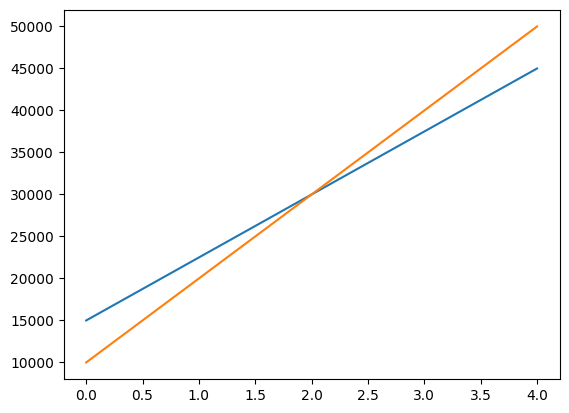

In [82]:
plt.plot([_alter * 750 for _alter in alter])
plt.plot(einkommen_pa)

In [134]:
alter = [20, 30, 40, 50, 60, 70, 80]
einkommen_pa = [10000, 20000, 30000, 40000, 50000, 40000, 40000]

einkommens_alter_indikator = [
    1000 * _alter + _einkommen for _alter, _einkommen in zip(alter, einkommen_pa)]
einkommens_alter_indikator

[30000, 50000, 70000, 90000, 110000, 110000, 120000]

In [ ]:
# Wir können die Spalten normalisieren, um sie besser vergleichen zu können

# Variante 1: Alle Werte einer Spalte durch den Maximalwert der Spalte teilen
# Variante 2: Alle Spalten um den Mittelwert der Spalte zentrieren und durch die Standardabweichung teilen

In [135]:
df = pd.DataFrame({"Alter": alter, "Einkommen_pa": einkommen_pa})
df

,Alter,Einkommen_pa
0,20,10000
1,30,20000
2,40,30000
3,50,40000
4,60,50000
5,70,40000
6,80,40000


In [85]:
df.mean()

Alter              40.0
Einkommen_pa    30000.0
dtype: float64

In [86]:
df.std()

Alter              15.811388
Einkommen_pa    15811.388301
dtype: float64

### Variante 1: Alle Werte einer Spalte durch den Maximalwert der Spalte teilen

Wir teilen alle Werte einer Spalte durch den Maximalwert der Spalte. Das führt dazu, dass alle Werte im Bereich von 0 bis 1 liegen.

In [92]:
(df["Alter"] - df["Alter"].min()) / (df["Alter"].max() - df["Alter"].min())

0    0.00
1    0.25
2    0.50
3    0.75
4    1.00
Name: Alter, dtype: float64

Das entspricht der Funktionsweise des Min-Max-Scalers.

In [136]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

transformed_data = scaler.fit_transform(df)
pd.DataFrame(transformed_data, columns=df.columns)

,Alter,Einkommen_pa
0,0.000000,0.00
1,0.166667,0.25
2,0.333333,0.50
3,0.500000,0.75
4,0.666667,1.00
5,0.833333,0.75
6,1.000000,0.75


In [137]:
# Das sind die Skalierungsparameter, die der Scaler gelernt hat
scaler.scale_

array([1.66666667e-02, 2.50000000e-05])

In [138]:
pd.DataFrame(scaler.inverse_transform(transformed_data))

,0,1
0,20.0,10000.0
1,30.0,20000.0
2,40.0,30000.0
3,50.0,40000.0
4,60.0,50000.0
5,70.0,40000.0
6,80.0,40000.0


Variante 2: Alle Spalten um den Mittelwert der Spalte zentrieren und durch die Standardabweichung teilen

In [143]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

transformed_data = scaler.fit_transform(df)
transformed_data = pd.DataFrame(transformed_data, columns=df.columns)
transformed_data

,Alter,Einkommen_pa
0,-1.5,-1.788854
1,-1.0,-1.006231
2,-0.5,-0.223607
3,0.0,0.559017
4,0.5,1.341641
5,1.0,0.559017
6,1.5,0.559017


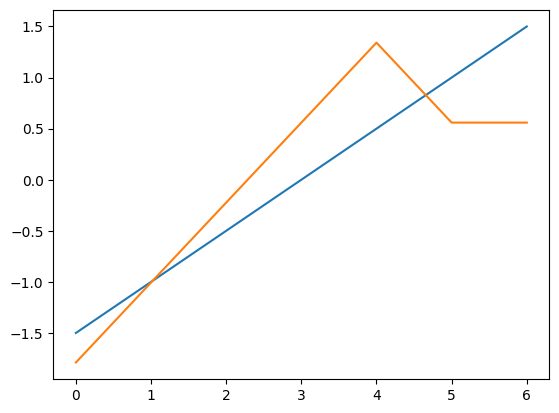

In [145]:
plt.plot(transformed_data["Alter"])
plt.plot(transformed_data["Einkommen_pa"])

In [140]:
print(scaler.scale_)
print(scaler.mean_)
print(scaler.var_)

[   20.     12777.5313]
[   50.         32857.14285714]
[4.00000000e+02 1.63265306e+08]


In [123]:
pd.DataFrame(scaler.inverse_transform(transformed_data), columns=df.columns)

,Alter,Einkommen_pa
0,20.0,10000.0
1,30.0,20000.0
2,40.0,30000.0
3,50.0,40000.0
4,60.0,50000.0


In [104]:
(df["Alter"] - df["Alter"].mean()) / df["Alter"].std()

0   -1.264911
1   -0.632456
2    0.000000
3    0.632456
4    1.264911
Name: Alter, dtype: float64

### Kleiner Exkurs zu Normalverteilungen


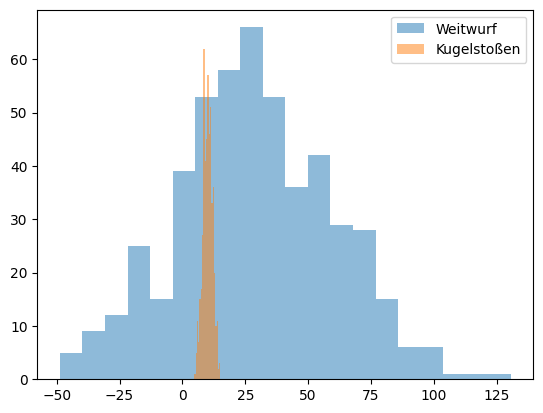

In [ ]:
import numpy as np

weitwurf = np.random.normal(30, 30, 500)
kugelstossen = np.random.normal(10, 2, 500)


plt.hist(weitwurf, bins=20, alpha=0.5, label="Weitwurf")
plt.hist(kugelstossen, bins=20, alpha=0.5, label="Kugelstoßen")
plt.legend()

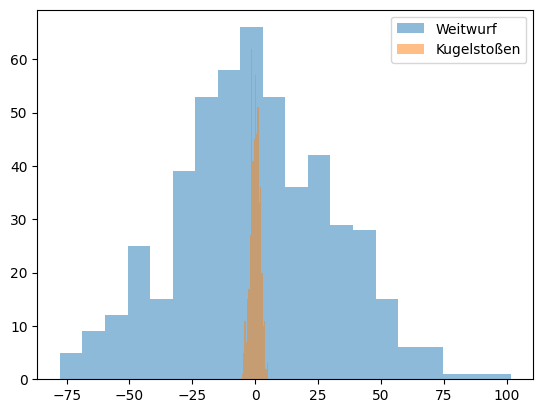

In [118]:
# Wir können die beiden Verteilungen nach links verschieben

weitwurf = weitwurf - weitwurf.mean()
kugelstossen = kugelstossen - kugelstossen.mean()

plt.hist(weitwurf, bins=20, alpha=0.5, label="Weitwurf")
plt.hist(kugelstossen, bins=20, alpha=0.5, label="Kugelstoßen")
plt.legend()

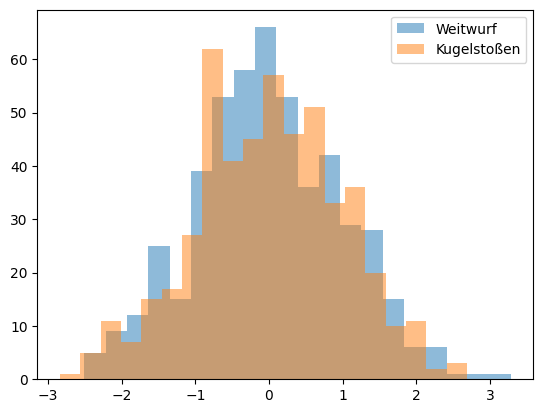

In [119]:
# Jetzt haben wir nicht berücksichtigt, dass bei weiteren Würfen sowieso eine größere Streuung zu erwarten ist
# Wir können das aber mit der Standardisierung berücksichtigen

weitwurf = (weitwurf - weitwurf.mean()) / weitwurf.std()
kugelstossen = (kugelstossen - kugelstossen.mean()) / kugelstossen.std()

plt.hist(weitwurf, bins=20, alpha=0.5, label="Weitwurf")
plt.hist(kugelstossen, bins=20, alpha=0.5, label="Kugelstoßen")
plt.legend()